In [1]:
"""First upload dataset on google colab"""
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Dataset_Task4.csv to Dataset_Task4.csv
User uploaded file "Dataset_Task4.csv" with length 3393 bytes


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

df = pd.read_csv('Dataset_Task4.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [4]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month

print("Data with new time-based features:")
print(df[['Start_Time', 'Hour', 'Day_of_Week', 'Month']].head())

Data with new time-based features:
           Start_Time  Hour Day_of_Week  Month
0 2023-08-10 14:30:00    14    Thursday      8
1 2023-09-05 18:00:00    18     Tuesday      9
2 2023-10-20 11:00:00    11      Friday     10
3 2022-12-01 22:15:00    22    Thursday     12
4 2023-05-15 16:45:00    16      Monday      5


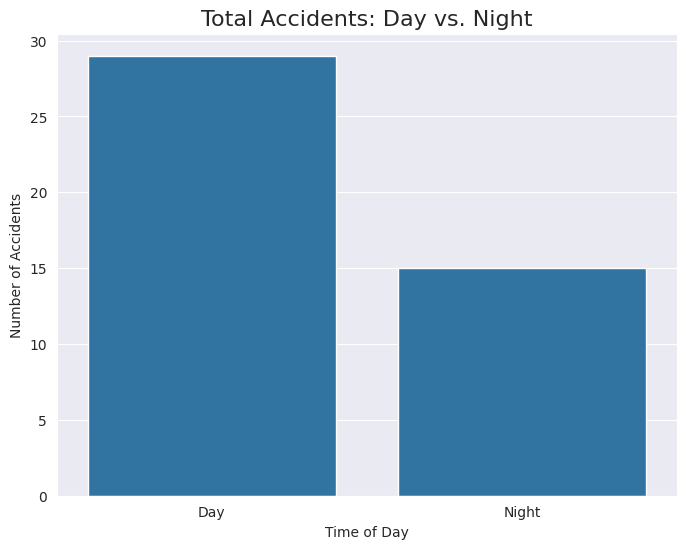

In [5]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(x='Sunrise_Sunset', data=df)
plt.title('Total Accidents: Day vs. Night', fontsize=16)
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

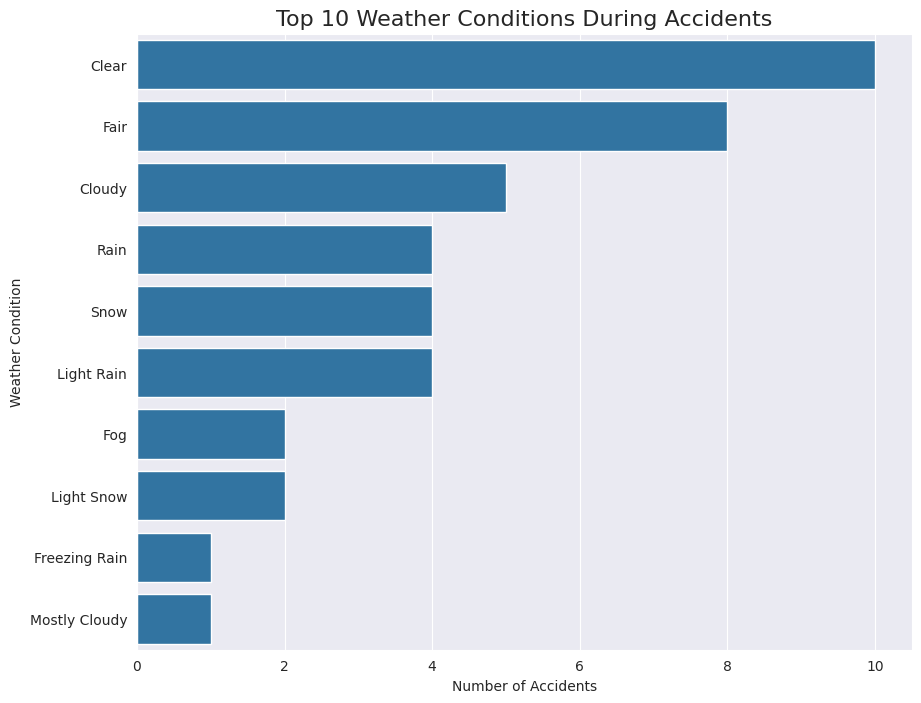

In [6]:
df_weather = df.dropna(subset=['Weather_Condition'])
top_10_weather = df_weather['Weather_Condition'].value_counts().nlargest(10).index

plt.figure(figsize=(10, 8))
sns.countplot(y='Weather_Condition', data=df_weather, order=top_10_weather)
plt.title('Top 10 Weather Conditions During Accidents', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

/tmp/ipython-input-1137472761.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Road_Condition', data=df_road, order=top_7_road_conditions, palette='viridis')


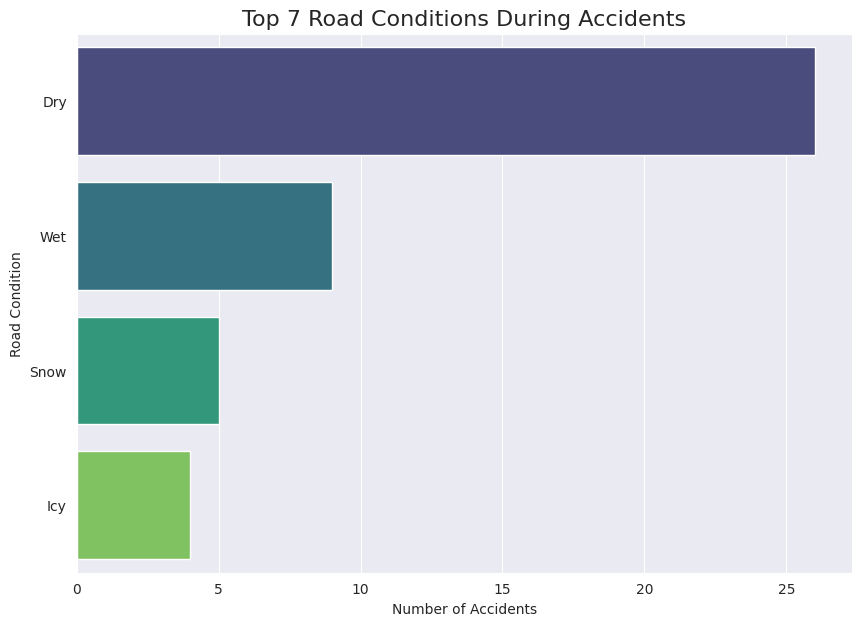

In [8]:
df_road = df.dropna(subset=['Road_Condition'])

    # Get the top 7 road conditions
top_7_road_conditions = df_road['Road_Condition'].value_counts().nlargest(7).index

plt.figure(figsize=(10, 7))
sns.countplot(y='Road_Condition', data=df_road, order=top_7_road_conditions, palette='viridis')
plt.title('Top 7 Road Conditions During Accidents', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Road Condition')
plt.show()


In [9]:
print("Generating accident hotspot map...")
sample_df = df.dropna(subset=['Start_Lat', 'Start_Lng'])

map_center = [sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

heat_data = list(zip(sample_df['Start_Lat'], sample_df['Start_Lng']))
HeatMap(heat_data).add_to(m)

map_filename = 'accident_hotspots.html'
m.save(map_filename)
print(f"Map has been saved to '{map_filename}'. Open this file in your browser.")

Generating accident hotspot map...
Map has been saved to 'accident_hotspots.html'. Open this file in your browser.
